##Bagging & Boosting KNN & Stacking Assignment

Q.1 What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?


--> The fundamental idea behind ensemble techniques is to combine multiple individual models (often called “weak learners”) to create a stronger overall model that performs better than any single one alone.
By aggregating predictions from several models, ensembles aim to reduce errors, increase accuracy, and improve generalization on unseen data.

Bagging (Bootstrap Aggregating)

Approach:

 - Multiple models (usually of the same type, e.g., Decision Trees) are trained independently on different random subsets of the training data.

 - Each subset is created using bootstrapping (sampling with replacement).

 - The final prediction is obtained by averaging (for regression) or voting (for classification) the outputs of all models.

Objective:

 - Reduce variance and prevent overfitting.

 - Works best with unstable learners (like decision trees) where small data changes can lead to big differences in predictions.

Example:
Random Forest is a popular bagging algorithm.

Boosting

Approach:

 - Models are trained sequentially — each new model focuses on correcting the errors made by previous models.

 - Data points misclassified by earlier models are given higher weights, so the next learner focuses more on those difficult cases.

 - The final prediction is a weighted combination of all models.

Objective:

 - Reduce bias and improve predictive accuracy by building a strong learner from many weak ones.

Example:
AdaBoost, Gradient Boosting, XGBoost, LightGBM are boosting methods.

Q.2 Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.


--> A Random Forest Classifier reduces overfitting compared to a single Decision Tree by combining the predictions of multiple trees, each trained on different subsets of the data and features.
This ensemble approach leads to a more robust and generalized model that performs well on unseen data.

Random Forest Reduces Overfitting

Multiple Trees Instead of One:

 - A single Decision Tree tends to learn the training data too well (high variance), capturing noise and overfitting.

 - Random Forest builds many trees and averages their predictions (for classification, it takes the majority vote).

 - This averaging smooths out noise, leading to better generalization.

Randomness in Data and Features:

 - Each tree is trained on a bootstrap sample (random subset with replacement) of the data.

 - At each split, only a random subset of features is considered.

 - This randomness ensures that trees are decorrelated, reducing the chance they all overfit in the same way.

Two Key Hyperparameters That Help Reduce Overfitting

1.n_estimators (Number of Trees)

 - Controls how many trees are built in the forest.

 - Higher values → better averaging and more stable predictions → reduces variance and overfitting.

 - Too few trees can lead to underfitting, but too many mainly increase computation time.

2.max_features (Number of Features Considered per Split)

 - Determines how many features the algorithm considers when splitting a node.

 - Smaller values → more randomness between trees → less correlation among trees → better overfitting control.

  - Typical values:
  
     - “sqrt” for classification (√number of features)

    - “log2” or a fixed number can also be used.

Q.3 What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.


--> Stacking (Stacked Generalization) is an ensemble learning technique that combines multiple different models (base learners) to make predictions, and then uses a meta-model (or blender) to learn how to best combine their outputs.

Instead of simply averaging (like bagging) or sequentially correcting errors (like boosting), stacking learns the optimal way to blend the predictions from various models.

How Stacking Works

1.Level-0 (Base Learners):

 - Several diverse models (e.g., Decision Tree, Logistic Regression, SVM) are trained on the same dataset.

 - Each produces its own predictions.

2.Level-1 (Meta Learner):

 - A new model (called the meta-model) is trained using the predictions of the base learners as input features.

 - It learns which base model performs best in different situations and combines them optimally.

 Stacking Differs from Bagging and Boosting

| Aspect                 | **Bagging**                          | **Boosting**                           | **Stacking**                                             |
| :--------------------- | :----------------------------------- | :------------------------------------- | :------------------------------------------------------- |
| **Model Type**         | Same type (e.g., all decision trees) | Same type (e.g., all weak learners)    | Different types (e.g., SVM + Tree + Logistic Regression) |
| **Training Approach**  | Parallel, independent                | Sequential, each fixes previous errors | Parallel (base models), then a meta-model combines them  |
| **Objective**          | Reduce variance                      | Reduce bias                            | Combine strengths of different algorithms                |
| **Combination Method** | Averaging or voting                  | Weighted sum (based on performance)    | Learned combination (meta-learner decides)               |


Simple Example Use Case

Use Case: Predicting whether a customer will churn (classification)

1.Base Learners:

 - Logistic Regression → captures linear patterns

 - Decision Tree → captures non-linear relationships

 - Random Forest → handles complex interactions

2.Meta Learner:

 - A simple Logistic Regression model takes the predictions of the above three models and learns how to weight them for the most accurate final prediction.

Result:
Stacking often performs better than any single model because it leverages the strengths of multiple algorithms.

Q.4 What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?


--> The Out-of-Bag (OOB) Score is an internal validation metric used in Random Forests to estimate model performance without needing a separate validation or test set.

It is based on the idea of bootstrap sampling, which is used to train each tree in the Random Forest.

How It Works

1.Bootstrap Sampling:

Each tree in the Random Forest is trained on a random sample (with replacement) of the training data.

Typically, about 63% of the samples are included in any given bootstrap sample.

The remaining ~37% of data (not selected) for that tree are called Out-of-Bag (OOB) samples.

2.OOB Prediction:

After training, each OOB sample is passed through all trees that did not see it during training.

The model aggregates (via majority voting or averaging) these predictions to get the OOB prediction for that sample.

3.OOB Score Calculation:

The OOB Score is then computed as the accuracy (for classification) or R² score (for regression) of these OOB predictions compared to the true labels.

OOB Score=Number of correct OOB predictions /Total number of samples

Why OOB Score is Useful

1.No Need for a Separate Validation Set:

It provides a built-in estimate of test accuracy, saving data that would otherwise be set aside for validation.

2.Efficient Use of Data:

All training samples are used for both training (in some trees) and validation (in others), maximizing data utilization.

3.Reliable Performance Estimate:

The OOB score is usually very close to cross-validation accuracy, giving a good indication of generalization performance.

Q.5 Compare AdaBoost and Gradient Boosting in terms of:

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

--> Comparison between AdaBoost and Gradient Boosting across the requested aspects

1.How They Handle Errors from Weak Learners
| Aspect                      | **AdaBoost**                                                                                   | **Gradient Boosting**                                                                                                                 |
| :-------------------------- | :--------------------------------------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------------ |
| **Error Handling Approach** | Each new weak learner **focuses more on the misclassified samples** from the previous learner. | Each new learner **fits to the residual errors (differences between actual and predicted values)** of the combined previous learners. |
| **Conceptual Focus**        | Reweights data points so that the next model corrects mistakes made by earlier ones.           | Uses **gradient descent** to minimize the overall loss function directly.                                                             |
| **Intuition**               | “Pay more attention to the hard-to-classify points.”                                           | “Model the errors step by step to minimize prediction loss.”                                                                          |

2.Weight Adjustment Mechanism

| Aspect                 | **AdaBoost**                                                                         | **Gradient Boosting**                                                                                                                         |
| :--------------------- | :----------------------------------------------------------------------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------- |
| **Weights on Samples** | Misclassified samples get **higher weights**, so future learners focus more on them. | No sample weights — instead, it **updates predictions** by adding a model that fits to the **negative gradient of the loss** (the residuals). |
| **Model Combination**  | Each weak learner is assigned a **weight (α)** based on its accuracy.                | Each new model contributes to the final prediction with a **learning rate (η)** that scales its influence.                                    |
| **Core Mechanism**     | Weight-based correction.                                                             | Gradient-based optimization.                                                                                                                  |

3.Typical Use Cases

| Aspect                   | **AdaBoost**                                                | **Gradient Boosting**                                            |
| :----------------------- | :---------------------------------------------------------- | :--------------------------------------------------------------- |
| **Best Suited For**      | Classification tasks (especially binary).                   | Both classification and regression tasks.                        |
| **Common Base Learners** | Shallow decision stumps (1-level trees).                    | Deeper decision trees (typically 3–8 levels).                    |
| **Performance**          | Simpler and faster, but can be sensitive to noise/outliers. | More flexible and powerful, handles complex patterns better.     |
| **Examples / Libraries** | `AdaBoostClassifier` in scikit-learn.                       | `GradientBoostingClassifier`, `XGBoost`, `LightGBM`, `CatBoost`. |


Q.6 Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.


--> CatBoost (short for Categorical Boosting) is specifically designed to handle categorical features efficiently and automatically, without needing one-hot encoding or label encoding.
It converts categorical values into meaningful numerical representations during training using advanced encoding techniques that prevent overfitting and bias.

CatBoost Handles Categorical Variables

1.No Manual Encoding Required

Unlike traditional algorithms that require one-hot encoding (which increases dimensionality) or label encoding (which can impose false ordinal relationships),
CatBoost internally converts categorical values into numerical values based on statistics from the data itself.

2.Uses Target Statistics (Target Encoding) with Randomization

For each categorical feature, CatBoost replaces the category with an average label value (e.g., mean target for regression or probability of class for classification).

However, to avoid target leakage, it computes this using only previous examples in a random permutation of the dataset.

Formula for a categorical value xi:

Encoded(xi​)=∑j<i​[xj​=xi​]⋅yj​+a⋅p/∑j<i​[xj​=xi​]+a

where:

𝑦𝑗: target value of previous samples

P: prior (overall mean of target)

a: smoothing parameter

This prevents data leakage and keeps the encoding unbiased.

3.Combinations of Categorical Features

 - CatBoost automatically creates combinations of categorical features (e.g., Feature_A + Feature_B) during training.

 - This helps it capture interactions between categories that one-hot encoding often misses.

4.Ordered Boosting

 - CatBoost introduces Ordered Boosting, a special training technique to avoid prediction shift (a kind of target leakage) that occurs in standard boosting when target-based statistics are used.

 - It ensures that each sample’s encoding and model prediction are based only on information available before that sample.

Why This Matters

- No need for manual preprocessing — CatBoost handles categories internally.    

- Prevents overfitting via randomized, order-dependent encoding.

 - Efficient with high-cardinality features (e.g., city names, user IDs).

 - Faster and more accurate than manually encoding and feeding into traditional models like XGBoost or LightGBM.



Q.7 KNN Classifier Assignment: Wine Dataset Analysis with
Optimization

Task:

1.Load the Wine dataset (sklearn.datasets.load_wine()).

2.Split data into 70% train and 30% test.

3.Train a KNN classifier (default K=5) without scaling and evaluate using:

a. Accuracy

b. Precision, Recall, F1-Score (print classification report)

4.Apply StandardScaler, retrain KNN, and compare metrics.

5.Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).

In [1]:
#Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

#Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

#Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Model 1: KNN without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

acc_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(" KNN (Without Scaling) Results:")
print("Accuracy:", acc_unscaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred_unscaled))

#Model 2: KNN with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

acc_scaled = accuracy_score(y_test, y_pred_scaled)
print("\n KNN (With StandardScaler) Results:")
print("Accuracy:", acc_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))

# Model 3: Optimized KNN using GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)
grid.fit(X_train_scaled, y_train)

best_params = grid.best_params_
best_knn = grid.best_estimator_

y_pred_best = best_knn.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)

print("\n Optimized KNN Results (Using GridSearchCV):")
print("Best Parameters:", best_params)
print("Accuracy:", acc_best)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Compare results
comparison = pd.DataFrame({
    "Model": ["Unscaled KNN", "Scaled KNN", "Optimized KNN"],
    "Accuracy": [acc_unscaled, acc_scaled, acc_best]
})

print("\n Accuracy Comparison:")
print(comparison)


 KNN (Without Scaling) Results:
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


 KNN (With StandardScaler) Results:
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Q.8 PCA + KNN with Variance Analysis and Visualization

Task:

1.Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).

2.Apply PCA and plot the scree plot (explained variance ratio).

3.Retain 95% variance and transform the dataset.

4.Train KNN on the original data and PCA-transformed data, then compare
accuracy.

5.Visualize the first two principal components using a scatter plot (color by class).

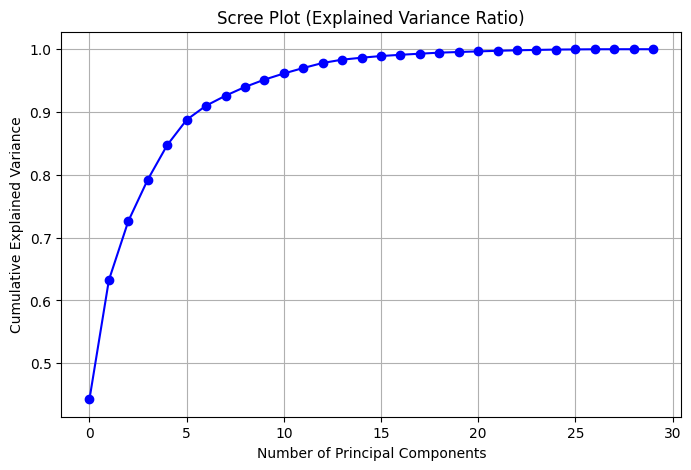

Number of components to retain 95% variance: 10


In [15]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

#Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

#Standardize the features (important before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply PCA without specifying components first (to analyze variance)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#Scree Plot: Explained Variance Ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Explained Variance Ratio)')
plt.grid(True)
plt.show()

#Retain 95% variance and transform the dataset
pca_95 = PCA(0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

#Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca_95, y, test_size=0.3, random_state=42, stratify=y
)






In [16]:
#Train KNN on Original Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

#Train KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)


 Accuracy Comparison:
KNN (Original Data): 0.9708
KNN (PCA-Reduced Data, 95% Variance): 0.9474

 Classification Report (PCA-Reduced Data):
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



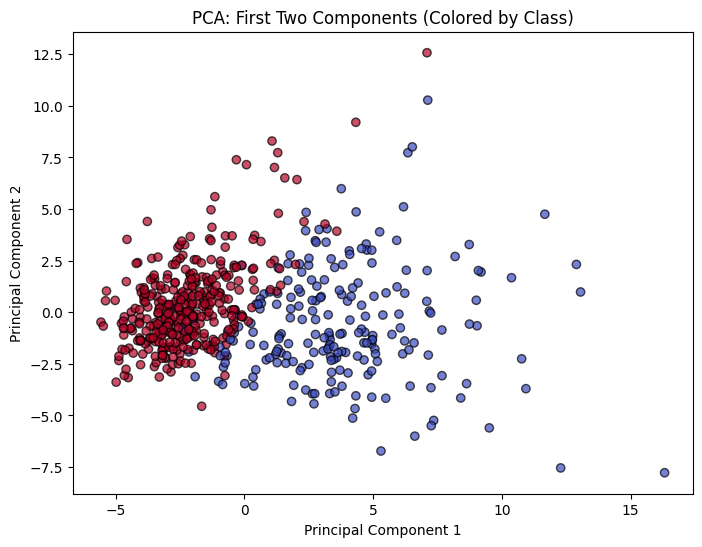

In [17]:
#Compare Accuracies
print("\n Accuracy Comparison:")
print(f"KNN (Original Data): {acc_original:.4f}")
print(f"KNN (PCA-Reduced Data, 95% Variance): {acc_pca:.4f}")

print("\n Classification Report (PCA-Reduced Data):")
print(classification_report(y_test, y_pred_pca))

#Visualization: First Two Principal Components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Components (Colored by Class)')
plt.show()

Visual Insights

Scree Plot: shows how much variance each component explains.

Scatter Plot: shows class separation along the first two PCs — often clearly distinguishable for the Breast Cancer dataset.

Q.9 KNN Regressor with Distance Metrics and K-Value
Analysis

Task:

1.Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).

2.Train a KNN regressor with:

a. Euclidean distance (K=5)

b. Manhattan distance (K=5)

c. Compare Mean Squared Error (MSE) for both.

3.Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

 KNN Regression Comparison (K=5):
Euclidean Distance - MSE: 4960.8962
Manhattan Distance - MSE: 5318.9501


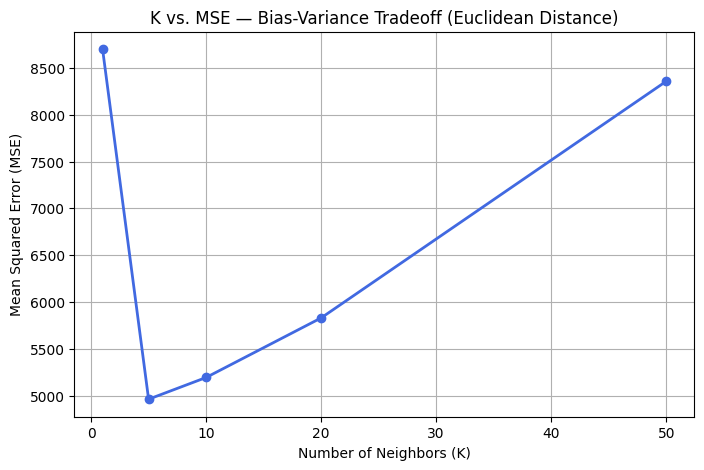

In [3]:
#KNN Regressor with Distance Metrics and K-Value Analysis
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#Generate a synthetic regression dataset
X, y = make_regression(
    n_samples=500, n_features=10, noise=15, random_state=42
)

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#Train KNN Regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

#Train KNN Regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Print comparison
print(" KNN Regression Comparison (K=5):")
print(f"Euclidean Distance - MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance - MSE: {mse_manhattan:.4f}")

# Analyze K values: 1, 5, 10, 20, 50
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', color='royalblue', linewidth=2)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs. MSE — Bias-Variance Tradeoff (Euclidean Distance)')
plt.grid(True)
plt.show()


Interpretation: Bias–Variance Tradeoff

Low K (e.g., K=1):

Model follows training data very closely → low bias, high variance, tends to overfit.

High K (e.g., K=50):

Predictions become smoother → high bias, low variance, tends to underfit.

The optimal K usually lies somewhere between 5–15, where MSE is minimal.

Q.10 KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data

Task:

1.Load the Pima Indians Diabetes dataset (contains missing values).

2.Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.

3.Train KNN using:

a. Brute-force method

b. KD-Tree

c. Ball Tree

4.Compare their training time and accuracy.

5.Plot the decision boundary for the best-performing method (use 2 most important
features).


In [13]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

#Load Pima Indians Diabetes Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=columns)
print("Original dataset shape:", df.shape)

#Replace invalid zeros with NaN (as they represent missing values)
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

print("\nMissing values before imputation:")
print(df.isnull().sum())

#KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=columns)

print("\nMissing values after imputation:")
print(df_imputed.isnull().sum())

#Split dataset into features and target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train and compare algorithms: brute, kd_tree, ball_tree
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}







Original dataset shape: (768, 9)

Missing values before imputation:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = (acc, train_time)
    print(f"\n Algorithm: {algo}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training Time: {train_time:.4f} seconds")
    print(classification_report(y_test, y_pred))




 Algorithm: brute
Accuracy: 0.7446
Training Time: 0.0022 seconds
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       150
         1.0       0.66      0.56      0.60        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231


 Algorithm: kd_tree
Accuracy: 0.7446
Training Time: 0.0016 seconds
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       150
         1.0       0.66      0.56      0.60        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231


 Algorithm: ball_tree
Accuracy: 0.7446
Training Time: 0.0012 seconds
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       150
         1.0       0.66      0.56

In [10]:
#Compare Results
results_df = pd.DataFrame(results, index=['Accuracy', 'Training Time']).T
print("\n Comparison of KNN Algorithms:")
print(results_df)

#Identify Best-Performing Method
best_algo = results_df['Accuracy'].idxmax()
print(f"\n Best Performing Algorithm: {best_algo}")

#Visualize Decision Boundary (Top 2 Important Features)

# Only top 2 most important features for visualization
# Approximation: correlation with target as importance proxy
corr = df_imputed.corr()['Outcome'].abs().sort_values(ascending=False)
top2_features = corr.index[1:3].tolist()
print(f"\nTop 2 features used for visualization: {top2_features}")



 Comparison of KNN Algorithms:
           Accuracy  Training Time
brute      0.744589       0.001002
kd_tree    0.744589       0.001740
ball_tree  0.744589       0.001485

 Best Performing Algorithm: brute

Top 2 features used for visualization: ['Glucose', 'Insulin']


In [9]:
# Prepare data for visualization
X_vis = df_imputed[top2_features]
y_vis = df_imputed['Outcome']

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)

# Train KNN with best algorithm on 2D data
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train_vis, y_train_vis)


KNeighborsClassifier(algorithm='brute')

In [7]:
# Create decision boundary
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

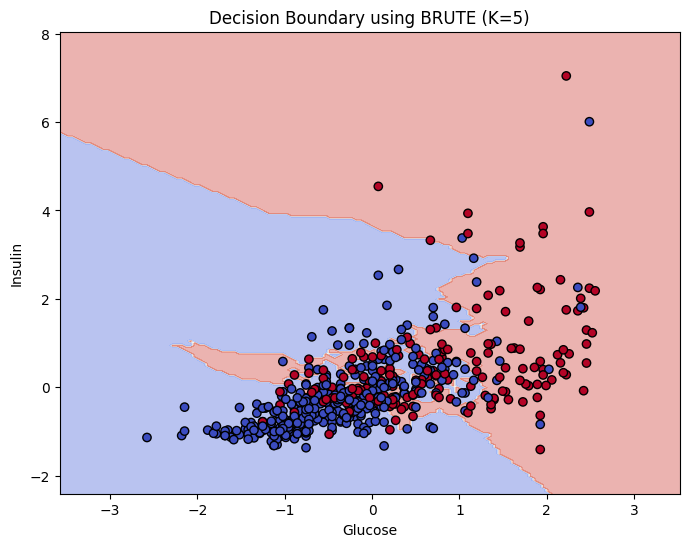

In [6]:
# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap='coolwarm', edgecolors='k')
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title(f"Decision Boundary using {best_algo.upper()} (K=5)")
plt.show()


Interpretation

Brute Force: Computes all pairwise distances — slower for large data.

KD-Tree: Partitions data space for faster neighbor search (good for continuous data, low–medium dimensions).

Ball Tree: Works better for high-dimensional or non-Euclidean spaces.